In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import ImageGrid

import os
import glob
import pandas as pd
import json

In [2]:
def get_db(data_dir):
    json_files = glob.glob(os.path.join(data_dir, "*.json"))
    data_list = []

    # Iterate through the JSON files and read them
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
            data_list.append(data)

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data_list)
    return df

In [3]:
data_dir = "/cluster/scratch/vogtva/data/gray_scott/"
df0 = get_db(data_dir)

In [4]:
df0['run_id'].unique()

array(['gs_vary_ab_correct'], dtype=object)

In [5]:
def delete_run(df, run_id):
    for i, row in df.iterrows():
        if row['run_id'] == run_id:
            filename = row['filename']
            df.drop(i, inplace=True)
            os.remove(filename)
            os.remove(filename.replace("_output.nc", ".json"))
            os.remove(filename.replace("_output.nc", ".nc"))

    return df


In [7]:
df = df0.copy()
# df = df[df['A'].isin([0.03, 0.038, 0.046])]
df = df.drop_duplicates(subset=['A', 'B'])
df

,model,A,B,Nx,dx,Nt,dt,Du,Dv,sigma_ic,random_seed,n_snapshots,filename,run_id
0,gray_scott,0.032,0.0512,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/f2912e...,gs_vary_ab_correct
1,gray_scott,0.038,0.0418,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/d6c4fc...,gs_vary_ab_correct
2,gray_scott,0.034,0.0544,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/f3cbee...,gs_vary_ab_correct
3,gray_scott,0.038,0.0570,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/6836b1...,gs_vary_ab_correct
4,gray_scott,0.036,0.0360,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/ea5da1...,gs_vary_ab_correct
5,gray_scott,0.030,0.0450,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/1b9957...,gs_vary_ab_correct
6,gray_scott,0.036,0.0396,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/8afe0e...,gs_vary_ab_correct
7,gray_scott,0.032,0.0544,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/143d0d...,gs_vary_ab_correct
8,gray_scott,0.034,0.0340,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/778801...,gs_vary_ab_correct
9,gray_scott,0.038,0.0456,400,0.5,5000,0.01,0.2,0.1,0.1,1,100,/cluster/scratch/vogtva/data/gray_scott/29d23d...,gs_vary_ab_correct


In [16]:
def ab_grid(df, component_idx=0, frame=-1, sigdigits=2, var1="A", var2="B", file="", an=False):

    if len(df) == 0:
        return None

    df = df.sort_values(by=[var1, var2])
    A_count = len(df[var1].unique())
    print(A_count)
    B_count = int(len(df) / A_count)
    print(B_count)
    fig = plt.figure(figsize=(16, 20))
    grid = ImageGrid(
        fig,
        111,
        nrows_ncols=(A_count, B_count),
        axes_pad=(0.1, 0.3)
    )

    ims = []

    for i, row in df.iterrows():
        ds = nc.Dataset(row["filename"])

        data = ds.variables["data"][:]
        ims.append((row, data[0, frame, :, component_idx::2]))
    
    for ax, (row, im) in zip(grid, ims):
        ax.set_title(f"{var1}={row[var1]:.{sigdigits}f}\n{var2} = {row[var2]:.{sigdigits}f}", fontsize=6)
        ax.imshow(im, cmap="viridis")
        ax.set_aspect("equal")
        ax.axis("off")
    row = df.iloc[0]
    if frame == -1:
        time = row["dt"] * row["Nt"]
    else:
        time = row["dt"] * frame * row["Nt"] / row["n_snapshots"]
    fig.suptitle(f"{row['model'].capitalize()}, Nx={row['Nx']}, dx={row['dx']}, dt={row['dt']}, T={time:.2f}", fontsize=16)
    
    if file != "":
        plt.savefig(file, dpi=500)
    if not an:
        plt.show()
    return grid

5
7


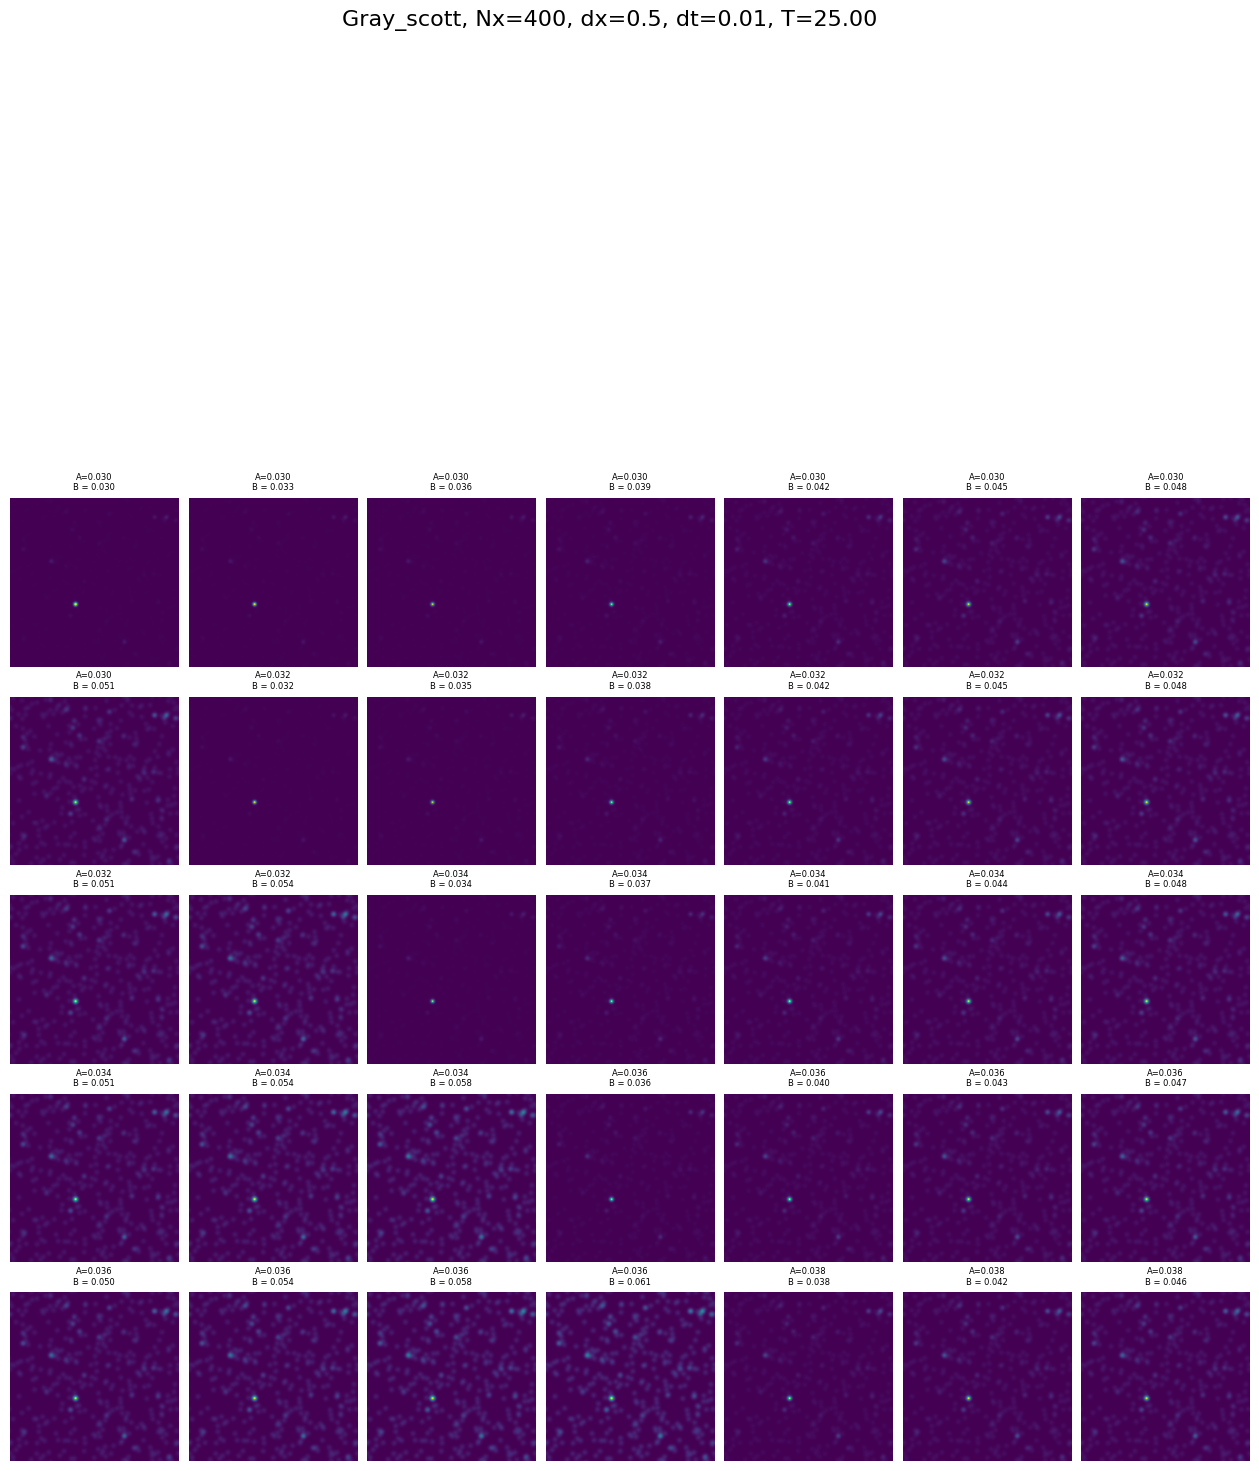

In [18]:
ab_grid(df, 1, frame=50, sigdigits=3, var1="A", var2="B")#, file='../out/grids/bruss_ab_half.png')

In [12]:
def ab_grid(
    df,
    Nt,
    dt=0.0025,
    Nx=400,
    dx=1.0,
    component_idx=0,
    frame=-1,
    sigdigits=2,
    var1="A",
    var2="B",
    file="",
    an=False,
):
    df_filtered = df[
        (df["Nt"] == Nt) & (df["dt"] == dt) & (df["Nx"] == Nx) & (df["dx"] == dx)
    ]
    if len(df_filtered) == 0:
        return None

    df_filtered = df_filtered.sort_values(by=[var1, var2])
    A_count = len(df_filtered[var1].unique())
    B_count = int(len(df) / A_count)
    fig = plt.figure(figsize=(20, 24))
    grid = ImageGrid(
        fig,
        111,
        nrows_ncols=(A_count, B_count),
        axes_pad=0.4,  # pad between Axes in inch.
    )

    ims = []

    for i, row in df_filtered.iterrows():
        ds = nc.Dataset(row["filename"])
        data = ds.variables["data"][:]
        ims.append((row, data[0, frame, :, component_idx::2]))

    for ax, (row, im) in zip(grid, ims):
        ax.set_title(
            f"{var1}={row[var1]:.{sigdigits}f}\n{var2} = {row[var2]:.{sigdigits}f}",
            fontsize=10,
        )
        ax.imshow(im, cmap="viridis")
        ax.set_aspect("equal")
        ax.axis("off")

    if file != "":
        plt.savefig(file, dpi=300)
    if not an:
        plt.show()
    return grid


In [ ]:
# df_a = df[df["A"] == 5.0]
# snapshot_grid(df_a, "A")

In [ ]:
grid_animator = lambda f: ab_grid(df, 50_000, 0.0025, 400, 0.5, frame=f, var1="Du", var2="Dv", an=True)

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
# artists = []
# for i in range(5):
#     artists.append(grid_animator(10 * i))
# ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
# ani.save("an.gif", dpi=150)